# Temperature tendency trends
## Calculate trends in tendency budget terms

In [45]:
import numpy as np
import xarray as xr
import cartopy.crs as ccrs
import scipy.stats as stats
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'statsmodels'

In [6]:
seasons = ['DJF','MAM','JJA','SON']
term_names = ['stw', 'tr_ed'] # only these for maps
first_year = 1979
last_year  = 2020

# To plot maps, select non zonal-mean data
zm = False

In [46]:
seas = seasons[0]
term_name = term_names[1]

In [47]:
save_dir = "/network/aopp/hera/mad/rhidian/data/ERA5/temperature_budget"     
base_savefile = '{sdir}/{term_name}_tendency_zonmean_{zm}_{seas}_{fy}_{ly}.nc'.format(
        sdir=save_dir, fy=first_year, ly=last_year, zm=zm, seas=seas, term_name=term_name)
    
    
# Load in budget terms
ds = xr.load_dataset(base_savefile)

In [11]:
ds

<xarray.Dataset>
Dimensions:     (time: 42, latitude: 181, longitude: 360, level: 20)
Coordinates:
  * time        (time) datetime64[ns] 1979-12-01 1980-12-01 ... 2020-12-01
  * latitude    (latitude) float32 90.0 89.0 88.0 87.0 ... -88.0 -89.0 -90.0
  * longitude   (longitude) float32 0.0 1.0 2.0 3.0 ... 356.0 357.0 358.0 359.0
  * level       (level) float64 1e+03 925.0 850.0 750.0 ... 100.0 70.0 50.0 10.0
Data variables:
    total       (time, level, latitude, longitude) float64 4.002e+07 ... 1.07...
    meridional  (time, level, latitude, longitude) float64 4.002e+07 ... 1.07...
    vertical    (time, level, latitude, longitude) float64 -1.235e-19 ... -2....
    adiabatic   (time, level, latitude, longitude) float64 -0.0 ... -3.159e-22
Attributes:
    creation_date:  2022-04-21 17:10:13.096425
    author:         Rhidian Thomas
    email:          rhidian.thomas@physics.ox.ac.uk
    units:          K/season
    long_name:      stationary waves

In [48]:
### Trends
ns_to_dec = (10**9)*3600*24*365.25*10
shape = ds.total.isel(time=0).shape

trend_array = np.zeros(shape)

time = ds.time.astype(int).values # integer rep of calendar dates

lat_i = 43
p_i = 10
lon_i = 100

y = ds.total.isel(latitude=lat_i).isel(level=p_i).isel(longitude=lon_i)

stats.linregress(x=time,y=y).slope * ns_to_dec

8.80125354805548

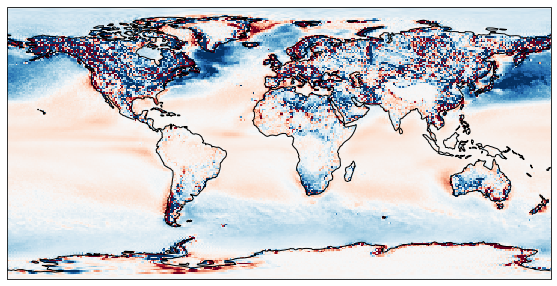

In [53]:
### Map plots ###
cent_lon = 0#-180 # Central longitude on the map (default = 0)
proj = ccrs.PlateCarree(central_longitude=cent_lon)    

plev = 850 #hPa: 850hPa ~ 1.5km
cmap = 'RdBu_r'
vmin = -10
vmax = -vmin

lats = ds.latitude
lons = ds.longitude

X_lats,Y_lats = np.meshgrid(lons,lats)

fig, ax = plt.subplots(1,1,subplot_kw=dict(projection=proj), figsize=(10, 5))
#CS = ax.contour(X,Y,term['all_years'].mean(dim='time'),levels=8,colors='black',linewidths=0.5)
#im = ax.contourf(X,Y,diff/4,levels=levels,cmap=cmap,vmin=vmin,vmax=vmax)
im = ax.pcolormesh(X_lats,Y_lats,ds.vertical.sel(level=plev).mean(dim='time'),cmap=cmap,vmin=vmin*10,vmax=vmax*10)
#ax.clabel(CS)
ax.coastlines()
#ax.set_title(var+' linear trend, '+start+'-'+stop+' ('+seas+')')
#cb = fig.colorbar(im,  fraction=0.02, pad=0.02)
#cb.set_ticks(np.linspace(vmin,vmax,5))
#cb.set_label(units[var]+' per decade', rotation=270)
plt.show()    

